# Module 4: Homework

Working with Bank_marketing dataset

## Getting the Data 

In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2025-05-23 21:35:22--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [   <=>              ] 999.85K  1.97MB/s    in 0.5s    

2025-05-23 21:35:23 (1.97 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [3]:
!unzip bank+marketing.zip
!unzip bank.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [4]:
### Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [63]:
df = pd.read_csv('bank-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [64]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


## Dataset Preparation

In [65]:
interested = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

df = df[interested]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [59]:
# Types of Features

numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = list(set(df.columns) - set(numerical))
print(numerical)
print(categorical)


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['poutcome', 'job', 'y', 'housing', 'contact', 'marital', 'month', 'education']


In [66]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [68]:
## Treating/encoding the target variable

df.y = (df.y == 'yes').astype(int)

In [69]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

## Splitting the Data set

In [12]:
from sklearn.model_selection import train_test_split

In [70]:
full_train_df, test_df = train_test_split(df, test_size=0.2, random_state = 1)
train_df, val_df = train_test_split(full_train_df, test_size = 0.25, random_state= 1)

full_train_df, test_df = full_train_df.reset_index(drop =  True), test_df.reset_index(drop = True)
train_df, val_df = train_df.reset_index(drop = True), test_df.reset_index(drop = True)

In [71]:
train_df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,56,entrepreneur,married,tertiary,40,no,cellular,11,jul,123,2,-1,0,unknown,0
1,33,technician,married,secondary,4790,yes,cellular,20,apr,137,1,272,2,failure,0
2,32,technician,single,tertiary,392,yes,cellular,21,nov,148,2,-1,0,unknown,0
3,40,admin.,divorced,secondary,2129,no,cellular,30,apr,452,1,-1,0,unknown,1
4,54,unemployed,married,tertiary,1180,no,cellular,19,nov,394,2,-1,0,unknown,0


## Question 1: ROC AUC feature importance

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve

scores = []
for n in numerical:
    prediction = train_df[n].values
    ground_truth = train_df.y.values
    auc = roc_auc_score(ground_truth, prediction)
    if auc < 0.5:
        prediction = -prediction
        auc = roc_auc_score(ground_truth, prediction)
    scores.append(auc)
    print(f'Feature {n}, AUC: {auc}')



Feature age, AUC: 0.512185717527344
Feature balance, AUC: 0.5888313805382317
Feature day, AUC: 0.525957882383908
Feature duration, AUC: 0.8147002759670778
Feature campaign, AUC: 0.5714543015682159
Feature pdays, AUC: 0.5901276247352144
Feature previous, AUC: 0.5985653242764153


In [31]:
print('The numerial variabel with the highest AUC is duration with AUC ~ 0.813')

The numerial variabel with the highest AUC is duration with AUC ~ 0.813


## Question 2: Training the model



We first apply the one_hot encoding on the categorical variables and then train a logistic regression with these parameters

In [147]:
from sklearn.feature_extraction import DictVectorizer

categorical_dicts = train_df[categorical].to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
dv.fit(categorical_dicts)
dv.get_feature_names_out()

array(['contact=cellular', 'contact=telephone', 'contact=unknown',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'y'], dtype=object)

In [74]:
X_cat_train = dv.transform(categorical_dicts)

In [75]:
X_cat_train

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]], shape=(27126, 41))

In [76]:
X_num_train = train_df[numerical].values
X_num_train

array([[  56,   40,   11, ...,    2,   -1,    0],
       [  33, 4790,   20, ...,    1,  272,    2],
       [  32,  392,   21, ...,    2,   -1,    0],
       ...,
       [  52,  289,   21, ...,   13,   -1,    0],
       [  32,  312,   11, ...,    4,   -1,    0],
       [  38,  580,   30, ...,    6,   -1,    0]], shape=(27126, 7))

In [77]:
X_train = np.column_stack([X_num_train, X_cat_train])
y_train = train_df.y.values

In [143]:
## let's write a code that streamlines this extraction

def get_data_matrix(some_df, categorical, numerical):
    some_df = some_df.copy()
    y_inside = some_df.y.values
    del some_df['y']
    ##
    categorical = list(set(categorical) - set(['y']))
    dicts_inside = some_df[categorical].to_dict(orient = 'records')
    dv_inside = DictVectorizer(sparse = False)
    dv_inside.fit(dicts_inside)
    X_cat_inside = dv_inside.transform(dicts_inside)

    ## NUmerical
    X_num_inside = some_df[numerical].values

    ## Concatenate the data
    X_inside = np.column_stack([X_num_inside, X_cat_inside])
    return X_inside, y_inside

In [148]:
X_train,y_train = get_data_matrix(train_df, categorical, numerical)

In [149]:
## Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [150]:
model.fit(X_train, y_train)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [151]:
## Retriveing the data matrix of the val set

X_val, y_val = get_data_matrix(val_df, categorical, numerical)
X_val.shape, y_val.shape

((9043, 47), (9043,))

In [152]:
## Apply on the validation set
y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred_proba

array([0.00715495, 0.03591539, 0.47131822, ..., 0.09995643, 0.00790011,
       0.11951771], shape=(9043,))

In [154]:
## Let's get the AUC

auc_model_on_val = roc_auc_score(y_val, y_pred_proba)
round(auc_model_on_val, 5) ## THe AUC is around 0.89-0.90

np.float64(0.9057)

## Question 3: Precision and Recall

In [155]:
thresholds = np.arange(0, 1, 0.01)

# Pre-calculate ground truth positives/negatives
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
n_positive = actual_positive.sum()
n_negative = actual_negative.sum()

# Initialize metric lists
fprs = []
recalls = []  # same as TPR
precisions = []

for threshold in thresholds:
    predicted_positive = (y_pred_proba >= threshold)
    predicted_negative = (y_pred_proba < threshold)
    
    # Calculate confusion matrix elements
    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()

    # Calculate metrics
    recall = tp / n_positive if n_positive > 0 else 0  # TPR is the same as recall
    recalls.append(recall)
    
    fpr = fp / n_negative if n_negative > 0 else 0
    fprs.append(fpr)
    
    # Avoid division by zero in precision calculation
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    precisions.append(precision)

print('Done!')

Done!


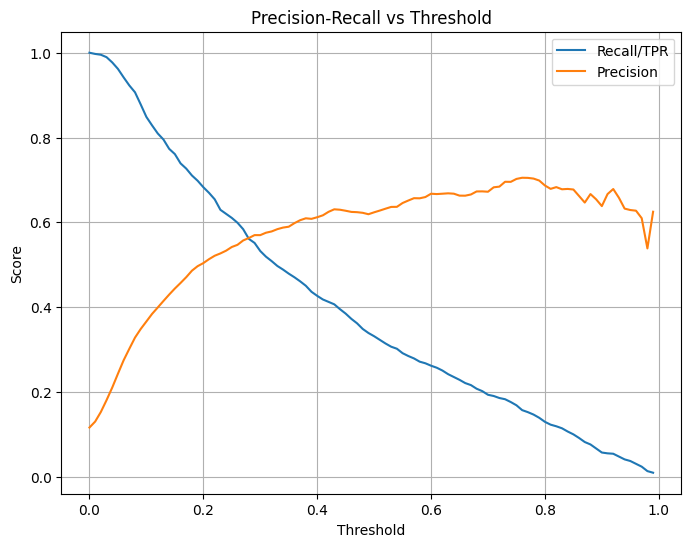

0.28 0.5630975143403442 0.560952380952381


In [160]:
## Plotting

plt.figure(figsize=(8, 6))
plt.plot(thresholds, recalls, label='Recall/TPR')
plt.plot(thresholds, precisions, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.grid(True)
plt.legend()
plt.show()

## where does precision and recall intersect

epsilon = 0.01
intersections = []
for i, t in enumerate(thresholds):
    prec = precisions[i]
    rec = recalls[i]
    ###
    if abs(prec - rec) < epsilon:
        print(t, prec, rec)
        break

In [161]:
print('the point of intersection is around ~ 0.28 ')

the point of intersection is around ~ 0.28 


## Question 4: F1 Score

Precision and recall are conflicting- when one grows, the other goes down. That's why they are often combined into the F1 score that takes into account both (the harmonic mean of them both)

F_1 = 2*(P*R)/(P + R)



In [162]:
f1s = []
for prec, rec in zip(precisions, recalls):
    f1 = 2*(prec * rec)/(prec + rec)
    f1s.append(f1)

f1s = np.array(f1s)
f1s

array([0.208065  , 0.23021108, 0.26489227, 0.30545348, 0.34615385,
       0.38786482, 0.42528488, 0.45482281, 0.48190332, 0.49891775,
       0.51162791, 0.52488688, 0.53475936, 0.54503916, 0.55238095,
       0.56070175, 0.56477438, 0.5713216 , 0.57717602, 0.58036421,
       0.57986252, 0.58099174, 0.58023649, 0.57353579, 0.57331572,
       0.57411554, 0.57181818, 0.57023256, 0.5620229 , 0.56050339,
       0.55046775, 0.54581873, 0.54130765, 0.53703704, 0.53354134,
       0.52863899, 0.52665245, 0.52324324, 0.51807229, 0.50804215,
       0.50280584, 0.49829739, 0.49684452, 0.49449913, 0.48566413,
       0.47697757, 0.46658711, 0.45810729, 0.44688645, 0.43815385,
       0.43283582, 0.42641509, 0.41984733, 0.41388175, 0.40956072,
       0.4015748 , 0.39628893, 0.39171123, 0.38409704, 0.38075881,
       0.37619699, 0.37113402, 0.36426593, 0.35524476, 0.34788732,
       0.33994334, 0.33142857, 0.3263839 , 0.31732169, 0.31062271,
       0.30029586, 0.29784066, 0.29213483, 0.28959276, 0.28115

In [163]:
max_at_threshold = thresholds[np.argmax(f1s)]

print(max_at_threshold) ## where they interesections 

0.21


## Question 5: 5-Fold Cross Validation

In [164]:
from sklearn.model_selection import KFold

In [165]:
KFold?

Init signature: KFold(n_splits=5, *, shuffle=False, random_state=None)
Docstring:     
K-Fold cross-validator.

Provides train/test indices to split data in train/test sets. Split
dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining
folds form the training set.

Read more in the :ref:`User Guide <k_fold>`.

For visualisation of cross-validation behaviour and
comparison between common scikit-learn split methods
refer to :ref:`sphx_glr_auto_examples_model_selection_plot_cv_indices.py`

Parameters
----------
n_splits : int, default=5
    Number of folds. Must be at least 2.

    .. versionchanged:: 0.22
        ``n_splits`` default value changed from 3 to 5.

shuffle : bool, default=False
    Whether to shuffle the data before splitting into batches.
    Note that the samples within each split will not be shuffled.

random_state : int, RandomState instance or None, default=None
    When `shuffle` is True, `

In [115]:
kf = KFold(n_splits=5, shuffle = True, random_state=1,)

In [166]:
X_fulltrain, y_fulltrain = get_data_matrix(full_train_df, categorical, numerical)

In [132]:
!pip install tqdm


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [133]:
from tqdm.auto import tqdm

In [170]:
auc_scores = []

# Iterate through folds
for fold in range(5):
    # Get indices for train-val split for this fold
    train_idx, val_idx = list(kf.split(X_fulltrain))[fold]
    
    # Split data using the indices
    X_train_fold = X_fulltrain[train_idx]
    X_val_fold = X_fulltrain[val_idx]
    y_train_fold = y_fulltrain[train_idx]
    y_val_fold = y_fulltrain[val_idx]
    
    # Train model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)
    
    # Get predictions and calculate AUC
    y_pred_fold = model.predict_proba(X_val_fold)[:, 1]
    auc = roc_auc_score(y_val_fold, y_pred_fold)
    auc_scores.append(auc)

In [171]:
auc_scores = np.array(auc_scores)
auc_scores.std()

np.float64(0.005531159570349564)

## Questions 6: Hyperparameter tuning

In [173]:
C = [0.000001, 0.001, 1]
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

mean_auc_scores = []
auc_stds = [] 

for c in tqdm(C):
    #Create a model
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    auc_scores = []
    # Iterate through folds
    for fold in range(5):
        # Get indices for train-val split for this fold
        train_idx, val_idx = list(kf.split(X_fulltrain))[fold]
        
        # Split data using the indices
        X_train_fold = X_fulltrain[train_idx]
        X_val_fold = X_fulltrain[val_idx]
        y_train_fold = y_fulltrain[train_idx]
        y_val_fold = y_fulltrain[val_idx]
        
        # Train model
        model.fit(X_train_fold, y_train_fold)
        
        # Get predictions and calculate AUC
        y_pred_fold = model.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_pred_fold)
        auc_scores.append(auc)
    auc_scores = np.array(auc_scores)
    mean_auc_scores.append(auc_scores.mean())
    auc_stds.append(auc_scores.std())

print(mean_auc_scores)
print(auc_stds)

  0%|          | 0/3 [00:00<?, ?it/s]

[np.float64(0.7014445869766514), np.float64(0.8609201067576363), np.float64(0.9058281899639663)]
[np.float64(0.009444095099939862), np.float64(0.00675342418343113), np.float64(0.005531159570349564)]


In [175]:
print(f'The best mean score for AUC is given by C = 1 with AUC ~ 0.90')

The best mean score for AUC is given by C = 1 with AUC ~ 0.90
